# An Explanatory Data Analysis On Data Science Salaries in 2023<a id="heading"></a>

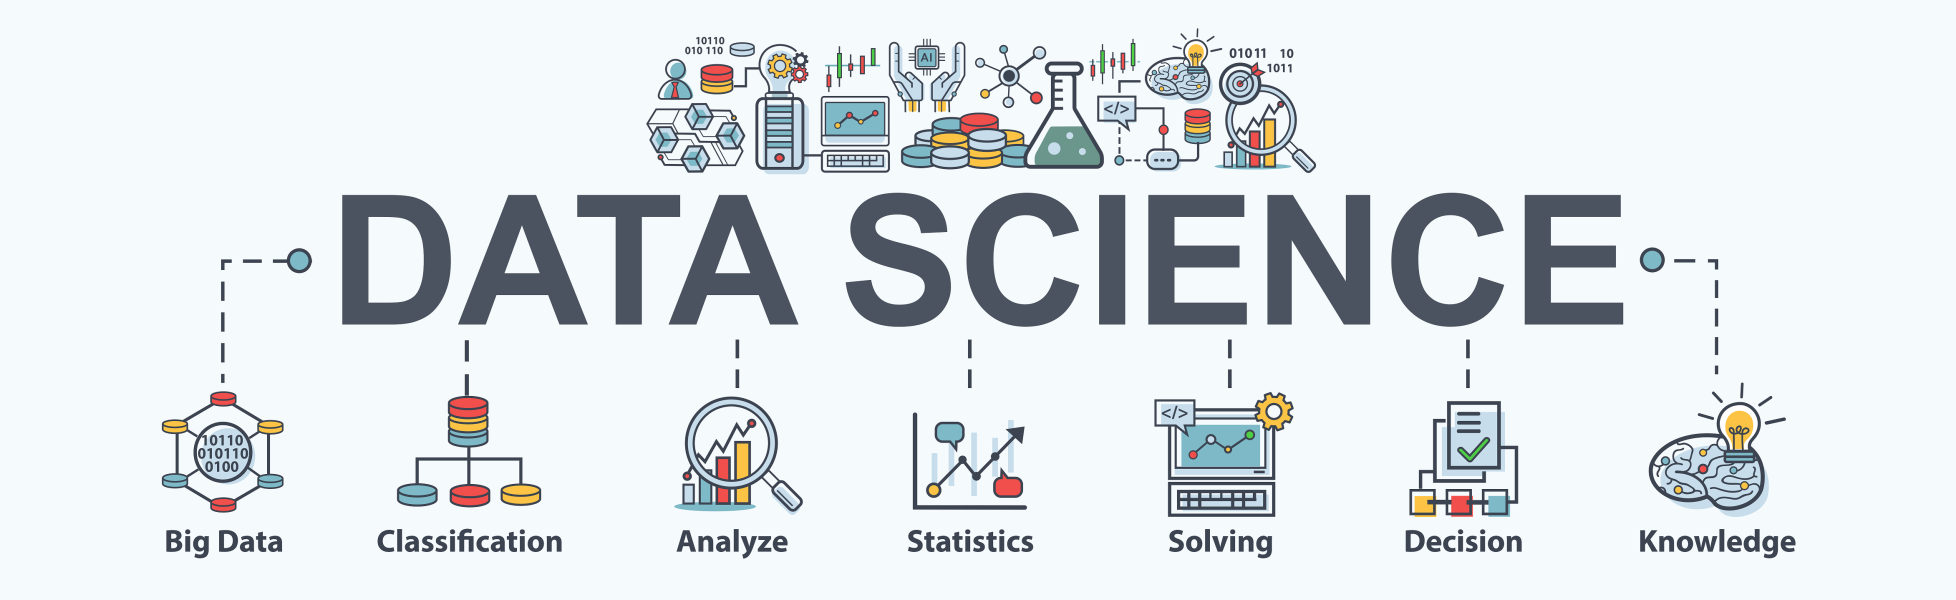

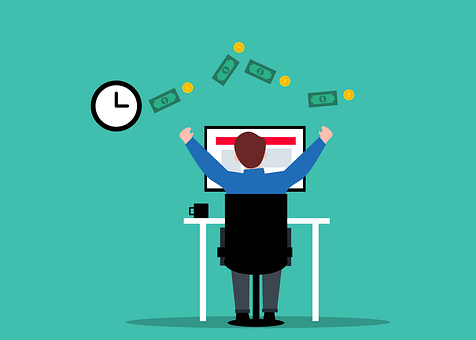

This notebook contains my very first project of data analysis. Hope you will give it a read and let me know the feedback. If you like it do upvote it. **Thank you!**

**TABLE OF CONTENTS**

-  [Importing Required Libraries](#importing_libraries)
-  [Loading Dataset](#load_dataset)
-  [Understanding The Data](#understanding_data)
-  [Manipulating The Data](#manipulation)
    -  [Defining function for faster bar plotting](#func_bar)
    -  [Top 10 Highest Paid jobs since 2020](#bar_all)
    -  [Top 10 Highest Paid jobs in 2023](#bar_2023)
    -  [Top 10 countries that paid Highest Salary in 2023](#salary_country_highest)
    -  [BarChart Showing the Average Salary for Each Level of Employees](#bar_level)
    -  [Lineplot Showing the Trends of Average Salary and Average Remote jobs](#line_plot)
    -  [Cheking For Correlation](#correlation)
    -  [Trend of change in Average Salary of different types of Employees](#change_in_salary)
    -  [PieChart to demonstrate the Average Salary received by different types of Employees](#pie_chart)
    -  [PieChart to demonstrate the number of employees  working through different modes](#pie_chart_mode)
-  [Conclusion](#conclusion)
    

## Importing Required Libraries <a id='importing_libraries'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import country_converter as coco


## Loading Dataset <a id='load_dataset'></a>

In [2]:
ds_df = pd.read_csv("D:\it_yk\programming\Data analysis learn\practise_projects\ds_salary_analysis\ds_salaries.csv")
ds_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## Understanding The Data <a id="understanding_data">

In [3]:
ds_df.shape

(3755, 11)

In [4]:
ds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


## Manipulating The Data <a id="manipulation">

Using the country_converter module to convert the short country names to easiy understandable form

In [5]:
countries_name = coco.convert(names=ds_df['company_location'], to='name_short')
ds_df['country_company'] = countries_name
employee_country = coco.convert(names=ds_df['employee_residence'], to='name_short')
ds_df['country_employee'] = employee_country
ds_df.sort_values('work_year', ascending=False).tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_company,country_employee
183,2020,EX,FT,Staff Data Analyst,15000,USD,15000,NG,0,CA,M,Canada,Nigeria
3683,2020,SE,FT,Big Data Engineer,100000,EUR,114047,PL,100,GB,S,United Kingdom,Poland
3682,2020,EN,FT,Data Engineer,4450000,JPY,41689,JP,100,JP,S,Japan,Japan
3681,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L,Pakistan,Pakistan
3576,2020,EN,PT,ML Engineer,14000,EUR,15966,DE,100,DE,S,Germany,Germany


#### Grouping the dataframe to get the average salary of the jobs <a id='ds_highest_all'>

In [6]:
ds_highest_all = ds_df.groupby('job_title').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd', ascending=False)
ds_highest_all_top=ds_highest_all[:10]
ds_highest_all_top


,salary_in_usd
job_title,
Data Science Tech Lead,375000.000000
Cloud Data Architect,250000.000000
Data Lead,212500.000000
Data Analytics Lead,211254.500000
Principal Data Scientist,198171.125000
Director of Data Science,195140.727273
Principal Data Engineer,192500.000000
Machine Learning Software Engineer,192420.000000
Data Science Manager,191278.775862


#### Defining a function for faster bar plotting <a id='func_bar'>

In [7]:
# defining a function to plot the graph using seaborn

def bar_plot_h(axes, x, y, x_label, y_label, palette, data):
    sns.barplot(x=x, y=y, palette=palette, data=data, ax=axes)
    sns.despine(top=True, bottom=True, right=True)
    axes.set_xlabel(x_label)
    axes.set_ylabel(y_label)
    axes.set_xticks([])
    for i,j in enumerate(data.values):
        axes.text(j+2,i, str(f"${round(j[0],3)}"))
    

### BarChart showing the Top 10 Highest Paid Jobs Since 2020  <a id='bar_all'>

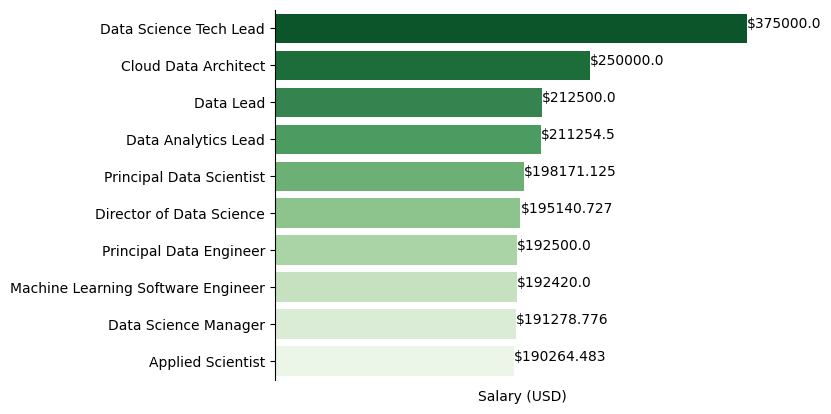

In [8]:
#plotting the graph for the highest paying jobs after 2020
fig,ax2 = plt.subplots()
bar_plot_h(ax2, 'salary_in_usd', ds_highest_all_top.index, "Salary (USD)", '', data=ds_highest_all_top, palette='Greens_r')

**Description of the BarPlot**

Data Science Technical Lead is the highest salary offering job followed by Cloud Data Architect and Data Lead.

#### Creating a dataframe for the year 2023 only <a id='df_2023'>

In [9]:
ds_df_2023 = ds_df[ds_df['work_year']==2023]
ds_df_2023

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_company,country_employee
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,Spain,Spain
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,United States,United States
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,United States,United States
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,Canada,Canada
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,Canada,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2023,SE,FT,Machine Learning Engineer,134500,USD,134500,US,0,US,L,United States,United States
1817,2023,MI,FT,Data Scientist,130000,USD,130000,US,0,US,M,United States,United States
1818,2023,MI,FT,Data Scientist,90000,USD,90000,US,0,US,M,United States,United States
1819,2023,EN,FT,Data Engineer,160000,USD,160000,US,0,US,M,United States,United States


#### Grouping the dataframe to get the Average Salary of the jobs in 2023

In [10]:
ds_salary_2023 = ds_df_2023.groupby('job_title').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd', ascending=False)
ds_salary_2023_top = ds_salary_2023[:10]
ds_salary_2023_top


,salary_in_usd
job_title,
Director of Data Science,242728.666667
AI Scientist,231232.500000
Head of Data,224738.666667
Computer Vision Engineer,224240.000000
Data Lead,212500.000000
NLP Engineer,205000.000000
Data Science Manager,204290.954545
Machine Learning Scientist,194468.750000
Applied Scientist,191143.500000


### BarChart showing the Top 10 Highest Paying Jobs in 2023 <a id='bar_2023'>

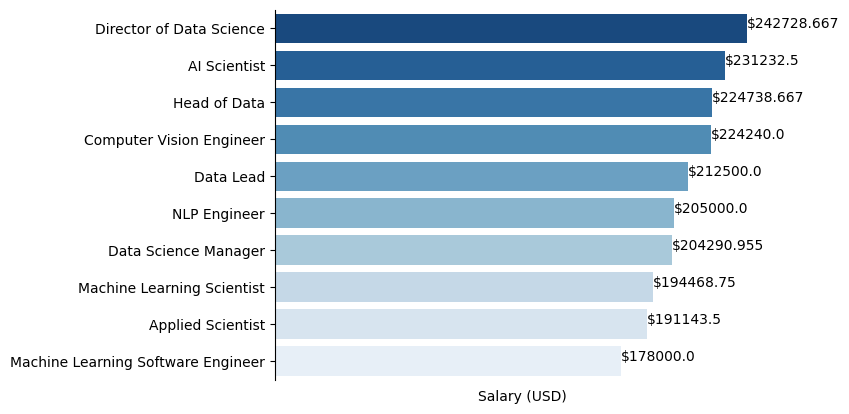

In [11]:
#plotting the bargraph using the above defined function
fig, ax1 = plt.subplots()
bar_plot_h(ax1, 'salary_in_usd', ds_salary_2023_top.index, 'Salary (USD)', '', data=ds_salary_2023_top, palette='Blues_r')


**Description of the BarPlot**

Clearly, Director of Data Science is the highest paid job of 2023 followed by AI Scientist and Head of Data. The last job in the top 10 list Machine Learning Software Engineer have a salary greater than $175,000, such a salary is attractive for any job.

#### Grouping according to the countries that paid The Highest Average Salary in 2023

In [12]:
ds_country_salary_2023 = ds_df_2023.groupby('country_company').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd', ascending=False)
ds_country_salary_2023_top = ds_country_salary_2023[:10]
ds_country_salary_2023_top

,salary_in_usd
country_company,
Israel,423834.000000
United States,156784.980892
Canada,148996.000000
Germany,126075.357143
Switzerland,121093.000000
Bosnia and Herzegovina,120000.000000
Ireland,112800.400000
Sweden,105000.000000
Netherlands,98289.000000


### BarChart Showing the Top 10 countries that paid Highest Salary in 2023 <a id='salary_country_highest'>

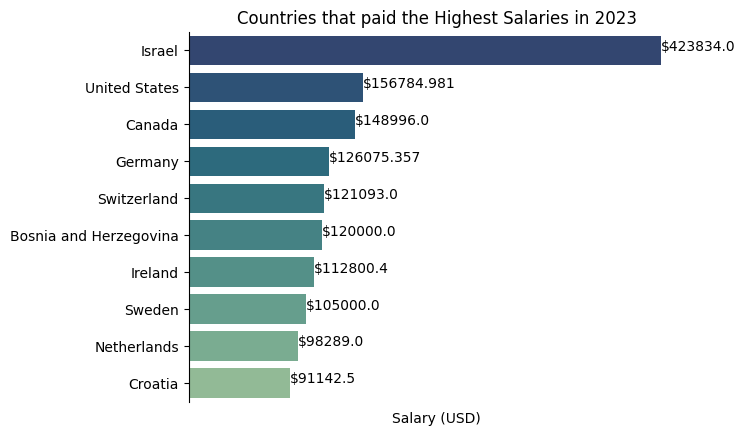

In [13]:
#plotting the bar graph using the above defined function
fig,ax3=plt.subplots()
bar_plot_h(ax3, 'salary_in_usd', ds_country_salary_2023_top.index, 'Salary (USD)', '', data=ds_country_salary_2023_top, palette='crest_r' )
ax3.set_title('Countries that paid the Highest Salaries in 2023')
plt.show()


**Description of BarPlot**<br>
A company based on Israel provided a huge salary to its employee. Companies based on the Unites States and Canada follows the race.

**To view the job that got paid a whopping salary of $423,834**

In [14]:
ds_df_2023.query("country_company=='Israel'")

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,country_company,country_employee
528,2023,SE,FT,AI Scientist,1500000,ILS,423834,IL,0,IL,L,Israel,Israel


We can see that a job of AI Scientist got paid the salary.

#### Grouping the dataframe to get the mean salary received by different level of job positions <a id='ds_level'>

The terms in the 'experience_level' column mean the following:

SE =  Senior Level <br> MI = Intermediate level <br> EN = Entry level <br> EX = Executive level

In [15]:
ds_level = ds_df_2023.groupby('experience_level').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd',ascending= False)
ds_level

,salary_in_usd
experience_level,
EX,203705.683333
SE,159568.928516
MI,116297.596875
EN,95283.966102


### BarChart Showing the Average Salary for Each Level of Employees <a id='bar_level'>


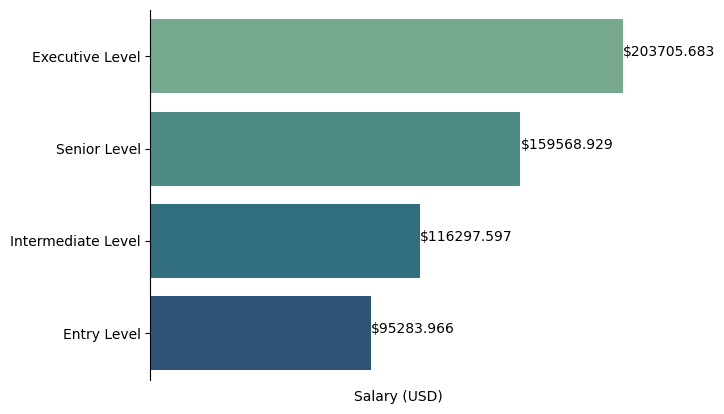

In [16]:
#plotting the bar graph using the function created above
fig, ax4=plt.subplots()
bar_plot_h(ax4, 'salary_in_usd', ds_level.index, 'Salary (USD)', '', data= ds_level, palette='crest')
ax4.set_yticklabels(['Executive Level', 'Senior Level', 'Intermediate Level', 'Entry Level'])
# ax4.set_title('Average Salary according to Positions in 2023')
plt.show()


**Description of the BarPlot**

From the barplot, we can see the executive position get much more salary than any other level. For a beginner or a entry level employee the job offers about $95,000 which is itself a get salary for a beginner.

#### Grouping the Dataframe to get the Average Salary and Remote work ratio for the years <a id='ds_work_salary_remote'>

In [17]:
ds_work_salary = ds_df.groupby('work_year').agg({"salary_in_usd":'mean', 'remote_ratio':"mean"})
ds_work_salary

,salary_in_usd,remote_ratio
work_year,,
2020,92302.631579,65.131579
2021,94087.208696,68.695652
2022,133338.620793,55.408654
2023,149045.541176,34.061625


### Lineplot Showing the Trends of Average Salary and Average Remote jobs <a id='line_plot'>

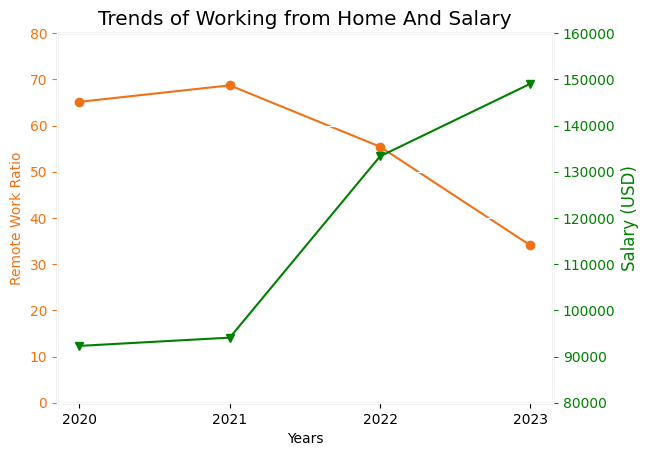

In [18]:
fig, ax5 = plt.subplots()
plt.style.use('ggplot')
ax5.plot(ds_work_salary.index, ds_work_salary['remote_ratio'], marker='o', color='#EF7215')
ax5.tick_params('y', colors='#EF7215')
ax5.set_ylim([0,80])
ax5.set_ylabel('Remote Work Ratio', color = '#EF7215')


ax6 = ax5.twinx()
ax6.plot(ds_work_salary.index, ds_work_salary['salary_in_usd'], marker='v', color='g')
ax6.set_ylabel('Salary (USD)', color='g')
ax6.set_yticks([i for i in range(80000, 170000, 10000)])
ax6.tick_params('y', colors='g')

ax5.set_xticks([2020, 2021, 2022, 2023])
ax5.set_xlabel('Years')
ax5.set_title('Trends of Working from Home And Salary')
plt.show()

**Describing The Line Plot**

This line plot shows that remote work ratio increased in the year 2020 and 2021 but now it is decreasing. This might be due to the pandemic we faced. Because of the lockdowns companies work were done remotely but now as the companies reopened and started running smoothly, they might want their employees to work come back to the offices. It can be viewed in real life scenerios as many of us started to go to our respective office after the pandemic, switching back our work from home lifestyle to home-office lifestyle.

The salary for the jobs related to data science seems to be increasing each year. This might not be the direct influence of the increase in year but due to other confounding factors that remain hidden here like; the amount of data stored in a company is huge and is increasing with increasing customers everyday, thus to gain the insights from the data and handle it more carefully every company now hires a data scientist or data analyst. So, bigger companies offer lucrative salary so that they attract the great minds for themselves. With the increase in data every minute and big data becoming mainstream we can say that the salaries for these jobs will increase in upcoming years too.

### Checking for Correlation <a id='correlation'>

In [19]:
corr_total = ds_df[['work_year','salary_in_usd', 'remote_ratio']].corr()
corr_total

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


We can see that the correlation between the values is almost equal to zero in all cases so we cannot directly imply that salary is associated with change in any of the other factors like year(time) and remote_ratio.<br> As mentioned above, the salary might change due to the confounding factors like economic status of the company, market value of the company, num. of projects done, total revenue of the company, etc. regarding which we yet don't have any insights in this dataset. Thus these confounding factors might affect the increase or decrease in salary in the coming years too.

### A Brief trend of change in Salary of Different types of Employees over the years <a id='change_in_salary'>

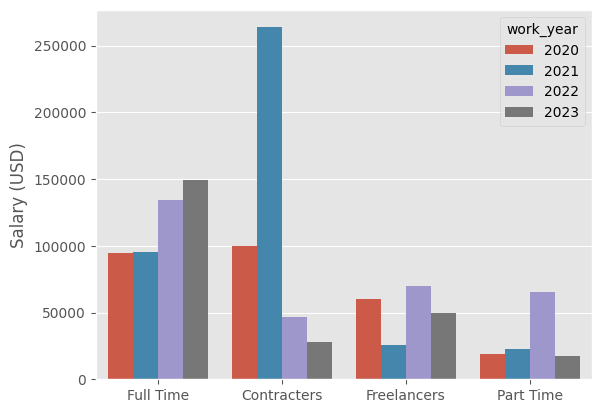

In [20]:
#plotting the bar garph using seaborn setting hue to work_year
fig, ax9= plt.subplots()
sns.barplot(ax=ax9, x='employment_type', y='salary_in_usd',data=ds_df, hue='work_year', errorbar=None)
ax9.set(xlabel='',ylabel='Salary (USD)', xticklabels=['Full Time', 'Contracters', 'Freelancers', 'Part Time'])
plt.show()

#### Grouping the Dataframe to get Average Salary for each Employment Type <a id='ds_worktime'>

The short forms in the 'employment_type' column mean the following:

FT: Full Time<br>CT: Contract Time<br>FL: Freelancing<br>PT: Part Time

In [21]:
ds_worktime = ds_df_2023.groupby('employment_type').agg({'salary_in_usd':'mean'}).sort_values('salary_in_usd',ascending=False)
ds_worktime

,salary_in_usd
employment_type,
FT,149366.860674
FL,50000.000000
CT,27750.000000
PT,17779.000000


### PieChart to demonstrate the Average Salary received by different types of Employees <a id='pie_chart'>

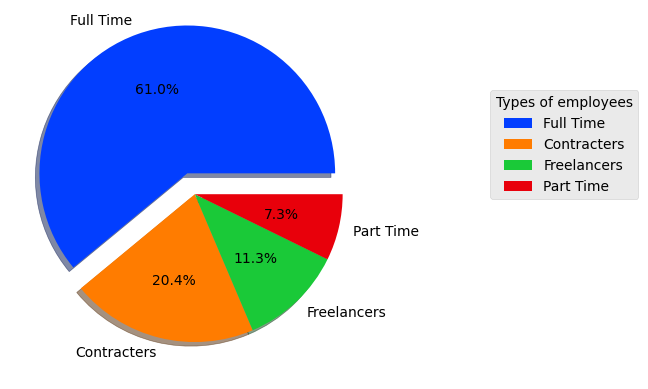

In [22]:
#plotting a piechart using matplotlib, using seaborn to color the chart
fig, ax7 = plt.subplots()
color_palette = sns.color_palette('bright')
my_explode = [0.15, 0, 0,0 ]
ax7.pie(ds_worktime['salary_in_usd'], labels=['Full Time', 'Contracters', 'Freelancers', 'Part Time'], autopct='%.1f%%', colors=color_palette, explode=my_explode, shadow=True)
ax7.legend(labels=['Full Time', 'Contracters', 'Freelancers', 'Part Time'], bbox_to_anchor=(1.5, 0.8), title='Types of employees', loc='upper center')
# ax7.set_title("Salaries Received different type of Employees")
plt.show()

**Description of the PieChart**

From the piechart, we can say that Full time employees tend to receive more salary than Contractors, Freelancers and Part Time employees. This might be because the full time employees are considered as valuable asset to the companies and are supposed to work with the company for long term and are not susceptible to leave anytime soon.<br>Hence, full time employees are offered with more lucrative salary.

#### Grouping the Dataframe to get the number of jobs available for different mode of work <a id='ds_remote'>

**The numbers used in the 'remote_ratio' column mean**<br>
0 = On-site(Working from office)<br>50 = Hybrid(Working from both office and home at times)<br>100 = Remote(Working from Home)

In [23]:
ds_remoteness = ds_df_2023.groupby('remote_ratio').agg({'remote_ratio':'count'})
ds_remoteness.columns=['num_of_jobs']
ds_remoteness.head()

,num_of_jobs
remote_ratio,
0,1162
50,30
100,593


### PieChart to demonstrate the number of employees  working through different modes <a id="pie_chart_mode">

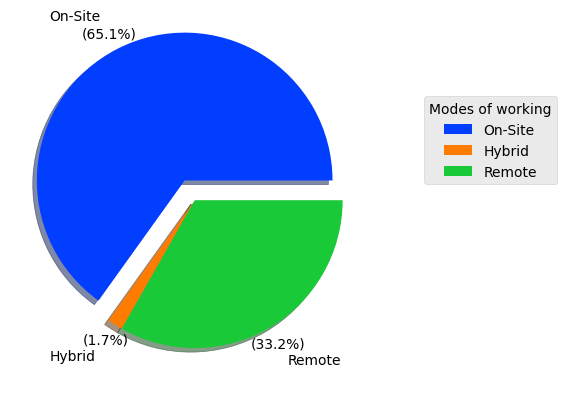

In [24]:
#plotting pie chart using matplolib and creating color palettes using seaborn
fig, ax8 = plt.subplots()
color_palette = sns.color_palette('bright')
my_explode = [0.15, 0, 0 ]
ax8.pie(ds_remoteness['num_of_jobs'], labels=['On-Site', 'Hybrid', 'Remote'], colors=color_palette, explode=my_explode, shadow=True, autopct='(%.1f%%)', pctdistance=1.12, labeldistance=1.25)
ax8.legend(labels=['On-Site', 'Hybrid', 'Remote'], bbox_to_anchor=(1.5, .8), title='Modes of working')
# ax8.set_title('Employees working through different Modes')
plt.show()

**Description of the PieChart**

The greater number of jobs related to data science are on-site jobs. In brief, we can say that jobs related to data science are flexible i.e, it can be performed on-site(in the office) and also remotely(from home) or it can just be the matter of choice for the employees in either way you feel comfortable making the jobs more attractive. From previous visualization we can conclude that these jobs are very lucrative and more people are attracted towards it in these times.

## Conclusion <a id='conclusion'>

To summarize, this analysis about the salaries of jobs related to data science we can say that job related to data science has great salary offering even for the entry level employee which attracts people towards this career. Although the remote mode of working is decreasing as the year passes, still there are about 33% employees working remotely which makes it a flexible career. As seen in the graph the average salary is increasing as the time passes but this might not be direct influence of time rather other confounding factors might be at play. Freelancers and students looking for part time jobs can also get a such jobs as it accepts all kinds of employees. Freelancing and working part time will let you have free time as well as a great source of income.
In brief, I think jobs related to data science are extremely attractive and with increasing scope in coming days. Such attractive job mixed with passion can do wonders in your life.

[Go To Top](#heading)